<a href="https://colab.research.google.com/github/Helaine-Ribeiro/Analise-Dados-Python/blob/main/Challenge_Teste_de_Hip%C3%B3teses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Challenge Teste de Hipóteses

# Desafio 1 : Cosméticos

Suponha que você trabalha em uma empresa do ramo de cosméticos ou beleza. O
Time de produtos dessa empresa está interessado criar novos batons com maior
durabilidade. Para isso estão testando 3 diferentes fórmulas para irem a mercado.

Com isso, a empresa fez uma pesquisa com varias voluntárias e populou a base de
dados (desafio_01_cosmeticos.csv) contendo as seguintes informacoes:

● id_produto: código identificador do produto, com a fórmula utilizada. Para
diferenciarmos se se trata do batom com a fórmula 1, 2 ou 3

● id_voluntária: código identificador da voluntária que utilizou o produto.

● durabilidade: quanto tempo o produto durou em horas.

● idade: idade da voluntária

● exposicao_sol: variável que indica 1 se a voluntária se expos ao sol 0 caso
contrário.

De posse dessas informacoes, o time de produtos solicitou aos analistas de dados da empresa as seguintes perguntas a serem respondidas:

1 - Existe diferenca estatisticamente significativa na durabilidade dos batons com formulas diferentes?

2 - Essa diferenca persiste ou nao quando a voluntária se expoe ao sol? E com
relacao a idade?

3- Qual fórmula de batom voce indicaria para consumidores que buscam maior
durabilidade e exposicao ao sol?

Mateiral de Apoio:
https://medium.com/rodrigo-lampier/usando-teste-de-hip%C3%B3teses-para-resp
onder-quest%C3%B5es-de-neg%C3%B3cio-8a3d5ae9ebc0

In [1]:
#### importando os pacotes
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns ## gráficos
import matplotlib.pyplot as plt ## gráficos
#Warnings: Possui uma série de funções e comandos para tratamento de mensagens de avisos e alertas do Python
import warnings
warnings.filterwarnings("ignore")

##from google.colab import drive ## conectar com o google drive para ler seus arquivos
## pd.set_option('displau.float_format'), lambda x: '%.5f' % x)

In [ ]:
# drive.mount('/content/drive') ##conectando com o google drive para ler os arquivos da nuvem

In [ ]:
## df = pd.read.csv("/content/drive/MyDrive/caminho do drive")

In [2]:
#Comando utilizado para carregar o arquivo e armazena-lo como um DataFrame do Pandas
#Um DataFrame do Pandas é como se fosse uma planilha do Excel, onde podemos tratar linhas e colunas.
df_cosmeticos = pd.read_csv("desafio_01_cosmeticos_challenge_testehipoteses.csv")
df_cosmeticos

,id_produto,id_voluntária,durabilidade,idade,exposicao_sol
0,1,1,12,40,1
1,2,2,5,36,0
2,1,3,19,47,0
3,1,4,14,36,1
4,1,5,17,46,1
...,...,...,...,...,...
295,3,296,18,52,0
296,3,297,30,19,0
297,3,298,43,23,1
298,3,299,41,19,0


In [3]:
#Comando utilizado para verificar informações sobre os dados(Tipo de variáveis, Variáveis, Quantidade de registros, etc)
df_cosmeticos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   id_produto     300 non-null    int64
 1   id_voluntária  300 non-null    int64
 2   durabilidade   300 non-null    int64
 3   idade          300 non-null    int64
 4   exposicao_sol  300 non-null    int64
dtypes: int64(5)
memory usage: 11.8 KB


In [4]:
# Comando utilizado para avaliar se alguma variável possui valor nulo ou chamado de valores missing ou NAN (Not Available)
df_cosmeticos.isnull().sum()

id_produto       0
id_voluntária    0
durabilidade     0
idade            0
exposicao_sol    0
dtype: int64

In [5]:
#Comando utilizado para fazer uma analise rápida com medidas estatisticas(Média, Mediana, Desvio Padrão, etc)
df_cosmeticos.describe()

,id_produto,id_voluntária,durabilidade,idade,exposicao_sol
count,300.000000,300.000000,300.000000,300.000000,300.000000
mean,2.000000,150.500000,17.133333,36.886667,0.440000
std,0.817861,86.746758,10.942945,12.625841,0.497216
min,1.000000,1.000000,5.000000,18.000000,0.000000
25%,1.000000,75.750000,9.000000,26.000000,0.000000
50%,2.000000,150.500000,14.000000,36.000000,0.000000
75%,3.000000,225.250000,20.000000,48.000000,1.000000
max,3.000000,300.000000,48.000000,60.000000,1.000000


Ao rodar as funções info e describe percebemos que:
1. Todas as variáveis da base disponobilizada são númericas.
2. Temos um dataset com 300 observações(de 300 voluntárias).
3. A idade média do estudo é de 36 anos, mínima 1 anos e máxima 60 anos.
4. Aproximadamente 50% da base teve exposição ao sol.
5. A média de durabilidade é de 17.13 horas

1- Diferença estatisticamente significativa na durabilidade dos batons com fórmulas diferentes: Para testar a diferença entre as fórmulas, usaremos a ANOVA. Vamos verificar se a média da durabilidade varia significativamente entre as três fórmulas:

Para responder essa pergunta primeiramente vamos plotar a durabilidade por tipo
de batom para uma análise visual e depois iremos realizar um teste de hipóteses

---

1.1 Análise visual:

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, ttest_ind
import statsmodels.api as sm

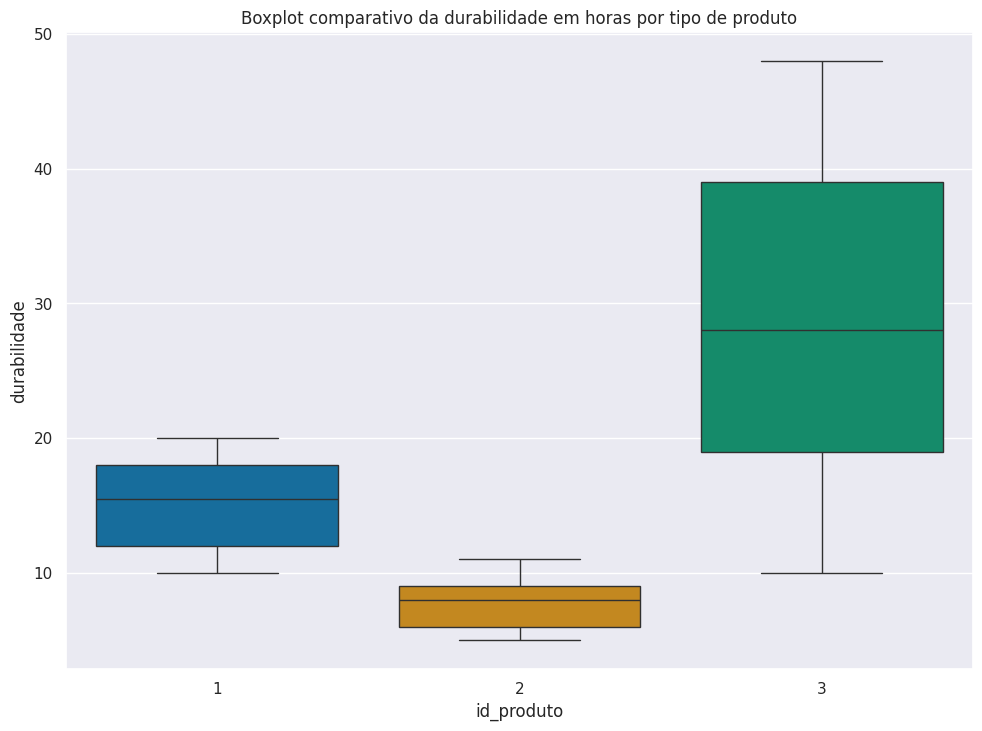

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(x='id_produto', y='durabilidade', data=df_cosmeticos, palette = "colorblind").set_title("Boxplot comparativo da durabilidade em horas por tipo de produto")

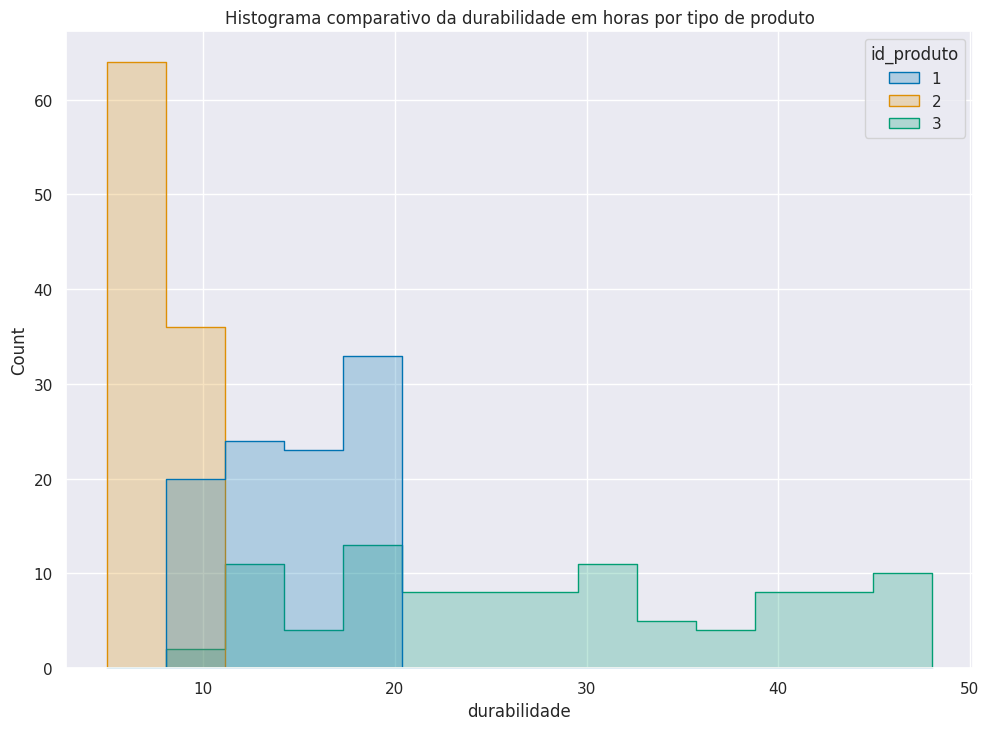

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.histplot(  data=df_cosmeticos, x='durabilidade', hue='id_produto',element="step", palette = "colorblind").set_title("Histograma comparativo da durabilidade em horas por tipo de produto")

através dos gráficos acima, podemos ver que:

*   a durabilidade do produto 3 parece ser mais inconsitente do que a dos outros produtos, apresentando maiores valores minimos e máximos.
*   Porém a mediana do produto 3 é muito mais alta do que a de seus "concorrentes". Dessa forma, temos um produto que o consumidor médio ficaria mais satisfeito com a sua durabilidade, porém apresentaria uma menor consistência.
*   As distribuições dos produtos apresentam formas bem distintas, visualmente o batom com fórmula 3 apresenta uma distribuição semelhante à uniforme. As outras distribuições, com fórmula 1 e 2 não parecem bem definidas.
*   Nota-se uma assimetria forte no batom de fórmula 1

----------
1.2 Teste de Hipótese:


O nosso objetivo é testar se a variável durabilidade é estatisticamente diferente para os tipos de fórmula mencionados.

Pela análise visual anterior vimos que principalmente a fórmula 3 se diferencia muito das outras.

Para testar se a distribuição de durabilidade é estatisticamente diferente de acordo com cada uma das fórmulas apresentadas,podemos utilizar diferentes testes. Podemos utilizar testes comparativos de médias paramétricos(que verifiquem  se as médias das diferentes fórmulas são iguais) ou podemos usar testes não parametricos, como o teste ks(kolmogarov-smirnov)

O teste KS mede se duas distribuições, são estatisticamente diferentes umas das outras, por meio da distância das distribuições cumulativas apresentadas. Se esses dados possuirem uma distância grande na distribuição cumulativa significa que vem de distribuições diferentes.

Esse teste é muito utilizado para teste e monitoramento de variáveis, e para decisão de retreinar modelos de machine learning!

Ela vai comparar a distribuição deprobabilidade cumulativa de duas amstras, ou de uma amostra e uma distribuição conhecida.


Na rática, quanto maior a distância entre as distribuições cumulativas, então maior a probabilidade de as distribuições serem diferentes.

A hipótese nula do teste é: Não há diferença entre as duas distribuições. Então nesse caso se o p-valor for < 0.05 as distribuições são diferentes.

Primeiro vamos armazenar a série da durabilidade de cada produto/fórmula

In [45]:
from scipy.stats import ks_2samp
## calcula a distribuição cumulativa
durabilidade_1 = df_cosmeticos[df_cosmeticos.id_produto ==1].durabilidade
durabilidade_2 = df_cosmeticos[df_cosmeticos.id_produto ==2].durabilidade
durabilidade_3 = df_cosmeticos[df_cosmeticos.id_produto ==3].durabilidade

Testando a durabilidade da fórmula 1 com a durabilidade da fórmula 2:

In [9]:
ks_2samp(durabilidade_1, durabilidade_2)

KstestResult(statistic=0.8, pvalue=3.5640292810890176e-32, statistic_location=11, statistic_sign=-1)

Como o p-valor do teste é menor do que 0.05, podemos inferir que a durabilidade da formula 1 e 2 são estatisticamente diferentes com 95% de confiança

---------------------------------------

In [10]:
ks_2samp(durabilidade_2, durabilidade_3)

KstestResult(statistic=0.98, pvalue=4.395433779467016e-55, statistic_location=11, statistic_sign=1)

In [11]:
ks_2samp(durabilidade_1, durabilidade_3)

KstestResult(statistic=0.7, pvalue=9.048888467758296e-24, statistic_location=20, statistic_sign=1)

O mesmo é valido comparando formula 1 com 3 e 2 com 3. Como o p-valor do teste é menor do que 0.05, podemos inferir que são estatisticamente diferentes com 95% de confiança.

# **Pergunta 2**: Essa diferenca persiste ou nao quando a voluntária se expoe ao sol? E com relacao a idade?

-----------------------------------------------
Para responder essa pergunta novamente iremos proceder com a análise visual e posteriormente realizar o teste KS

------------------------------------
**2.1 Análise Visual:** Exposição ao sol

--------------------------------------

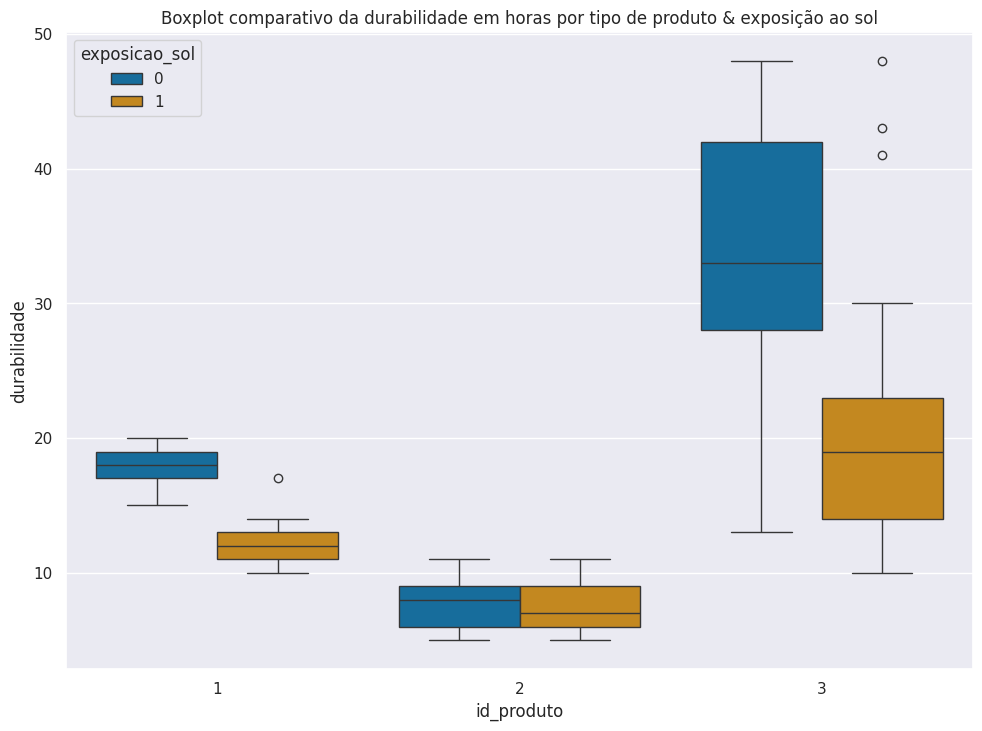

In [13]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(x='id_produto', y='durabilidade', hue = "exposicao_sol", data=df_cosmeticos, palette = "colorblind").set_title("Boxplot comparativo da durabilidade em horas por tipo de produto & exposição ao sol")

Pelo gráfico acima, notamos que para todos os casos, quando a voluntária se expos ao sol houve uma redução na mediana da distribuição da durabilidade. Para alguns produtos, entretanto, esse decrescimo foi maior do que para outros. No caso dos produtos 1 e 3 tivemos mais expressivas

**2.2 TEste KS:** Exposição ao sol
-----------------------------------------

In [22]:
durabilidade_1_exp_true = df_cosmeticos[(df_cosmeticos.id_produto ==1)&(df_cosmeticos.exposicao_sol ==1)].durabilidade
durabilidade_2_exp_true = df_cosmeticos[(df_cosmeticos.id_produto ==2)&(df_cosmeticos.exposicao_sol ==1)].durabilidade
durabilidade_3_exp_true = df_cosmeticos[(df_cosmeticos.id_produto ==3)&(df_cosmeticos.exposicao_sol ==1)].durabilidade

In [23]:
ks_2samp(durabilidade_1_exp_true, durabilidade_2_exp_true)

KstestResult(statistic=0.8333333333333334, pvalue=2.6202928286549403e-17, statistic_location=9, statistic_sign=-1)

In [24]:
ks_2samp(durabilidade_2_exp_true, durabilidade_3_exp_true)

KstestResult(statistic=0.9487179487179487, pvalue=8.988577494522911e-22, statistic_location=11, statistic_sign=1)

In [25]:
ks_2samp(durabilidade_1_exp_true, durabilidade_3_exp_true)

KstestResult(statistic=0.6957264957264957, pvalue=2.7195930012302357e-10, statistic_location=14, statistic_sign=1)

Conclusão: A diferença na durabilidade dos batons de diferentes fórmulas persiste, mesmo com exposição ao sol.

**2.3 Análise Visual:** idade
----------------------------------------------

Para analisar idade, podemos agregar tal varável em faixas etárias. Tal agregação pode ser definida com base na distribuição dos dados, ou até mesmo no ponto de vista de négocio.

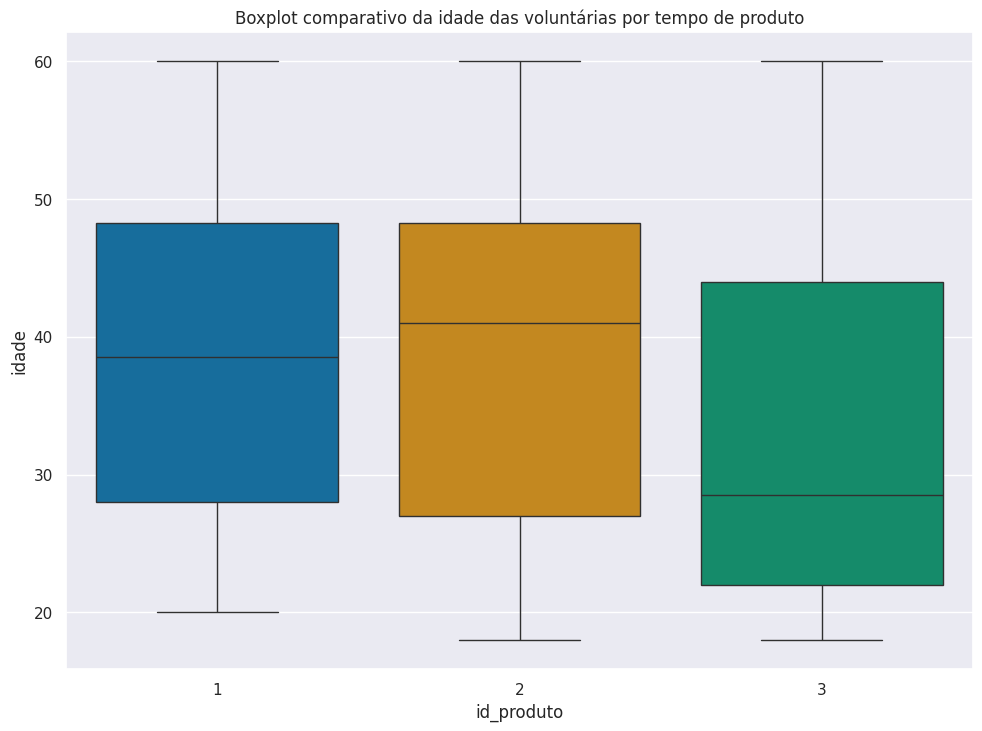

In [26]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(x='id_produto', y='idade', data=df_cosmeticos, palette = "colorblind").set_title("Boxplot comparativo da idade das voluntárias por tempo de produto")

Podemos perceber que o produto 2 tem uma mediana de idade maior do que os outros, próximo ao 40 anos, já o produto 3 tem uma mediana de idade inferior a 30 anos.


Vamos analisar o gráfico de dispersão dessas variáveis por produto

<Axes: xlabel='idade', ylabel='durabilidade'>

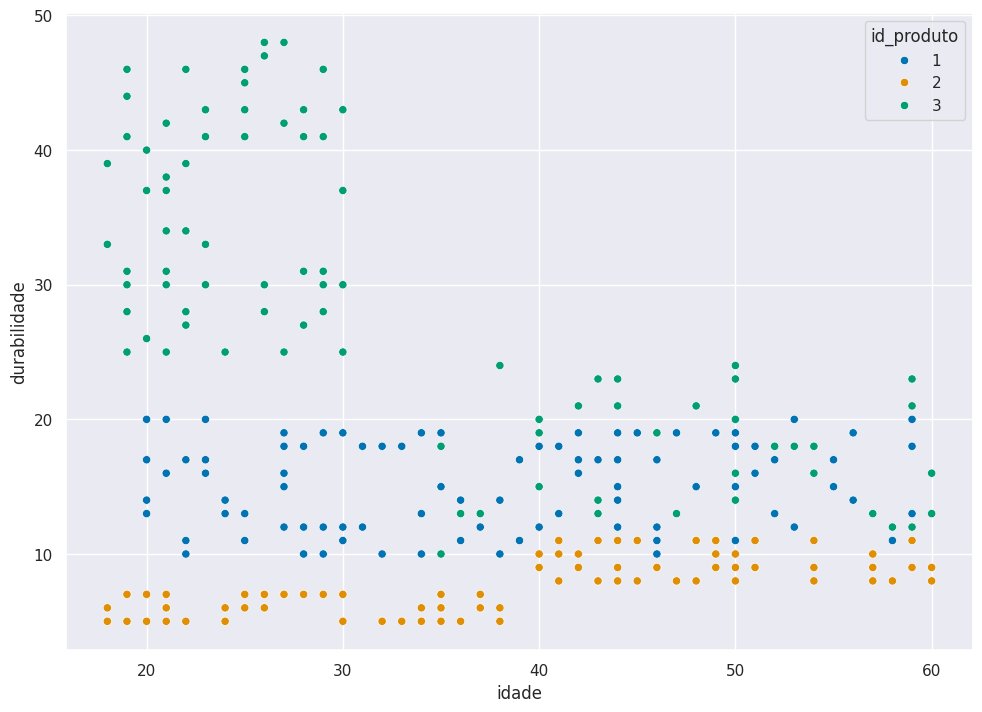

In [29]:
##gráfico de dispersão
sns.scatterplot(data=df_cosmeticos, x='idade', y='durabilidade', hue="id_produto", palette = "colorblind")

Já pela análise do scatterplot, ou gráfico de dispersão, podemos ver que


1.   Para o produto 1: idade não parece impactar na durabilidade
2.   Para o produto 2: a partir dos 40 anos vemos um aumento do patamar da durabilidade, ou seja, a durabilidade do produto parece ser melhor para esse público.
2.   Para o produto 3: até 30 anos o produto parece ter uma durabilidade maior. Para faixas de idade maiores a durabilidade em horas fica abaixo de 30.

Ou seja, pela análise visual, recomendariamos o produto 2 para mulheres acima de 40 anos e para o produto 3 recomendariamos o produto para mulheres até 40 anos.

 A suposição inicial é de que o produto 2 deve conter algum composto anti-aging na sua fórmula.

Dada a análise exploratória vamos agora definir as categorias de idade da seguinte forma:



*   Até 30 anos
*   De 30 a 40 anos
*   De 40 a 50 anos
*   Mais de 50 anos


In [31]:
## A função abaixo irá ser aplicada em cada uma das linhas do datframe para categorizar a faixa de idade
def categoria_idade(row):
    if row['idade'] <= 30:
        return "Ate_30_anos"
    elif 30 < row['idade'] <= 40:
        return "DE_31_a_40_anos"
    elif 40 < row['idade'] <= 50:
        return "DE_41_a_50_anos"
    else:
        return "Mais_de_50_anos"

In [32]:
## Aplicando a função criada
df_cosmeticos["faixa_etaria"] = df_cosmeticos.apply(categoria_idade, axis=1)

In [33]:
## Observando a quantidade de voluntárias em cada uma das faixas de idade
df_cosmeticos["faixa_etaria"].value_counts()

faixa_etaria
Ate_30_anos        124
DE_41_a_50_anos     78
DE_31_a_40_anos     49
Mais_de_50_anos     49
Name: count, dtype: int64

Analisando o boxplot da durabilidade por produto e faixa etária

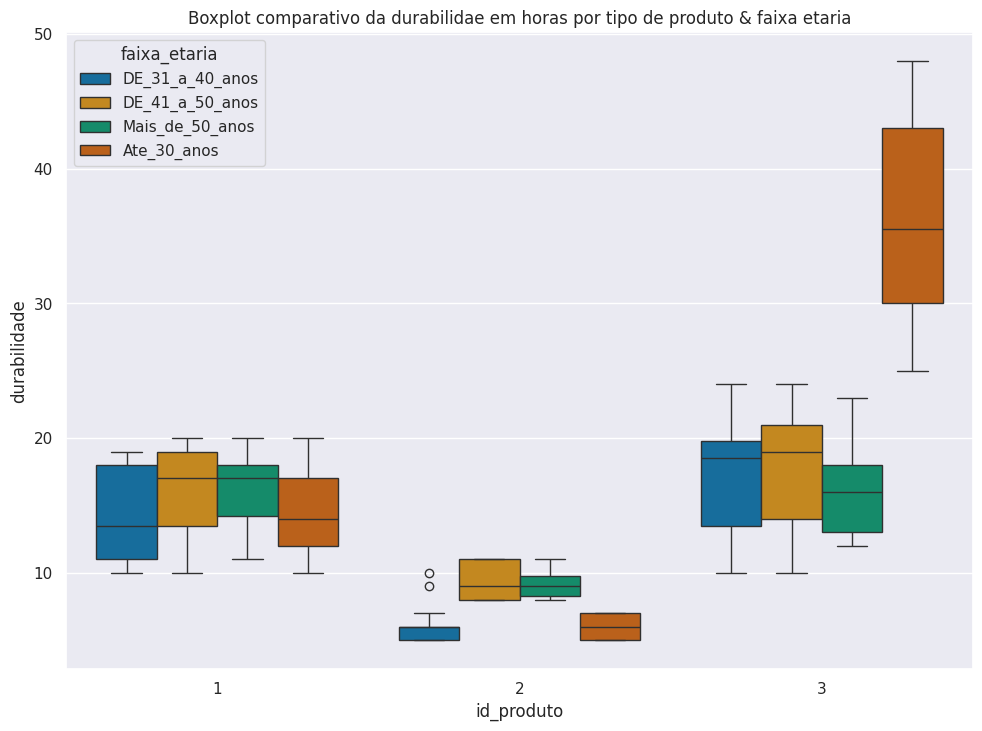

In [34]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(x='id_produto', y='durabilidade', hue= "faixa_etaria", data=df_cosmeticos, palette = "colorblind").set_title("Boxplot comparativo da durabilidae em horas por tipo de produto & faixa etaria")

Pelo gráfico podemos perceber que:



*   O Produto 1: Funciona melhor para mulheres acima de 40 anos(mediana mais deslocada) e pior dos 31 a 40 anos
*   O Produto 2: Funciona melhor para mulheres acima de 40 anos, conforme já vimos no gráfico de dispersão
*   O Produto 1: Funciona melhor para mulheres de 30 anos


**2.3 Teste de Hipótese:** idade

------------------------------------    

1. Até 30 anos


In [57]:
durabilidade_1_ate_30_anos = df_cosmeticos[(df_cosmeticos.id_produto ==1)&(df_cosmeticos.faixa_etaria =="Ate_30_anos")].durabilidade
durabilidade_2_ate_30_anos = df_cosmeticos[(df_cosmeticos.id_produto ==2)&(df_cosmeticos.faixa_etaria =="Ate_30_anos")].durabilidade
durabilidade_3_ate_30_anos = df_cosmeticos[(df_cosmeticos.id_produto ==3)&(df_cosmeticos.faixa_etaria =="Ate_30_anos")].durabilidade

In [58]:
print(ks_2samp(durabilidade_1_ate_30_anos, durabilidade_2_ate_30_anos))
print(ks_2samp(durabilidade_2_ate_30_anos, durabilidade_3_ate_30_anos))
print(ks_2samp(durabilidade_1_ate_30_anos, durabilidade_3_ate_30_anos))

KstestResult(statistic=1.0, pvalue=1.1254353546489764e-18, statistic_location=7, statistic_sign=-1)
KstestResult(statistic=1.0, pvalue=1.0121606088575607e-24, statistic_location=7, statistic_sign=1)
KstestResult(statistic=1.0, pvalue=1.249230484985489e-25, statistic_location=20, statistic_sign=1)


**Conclusão:** As distribuições da durabilidade dos produtos são estatisticamente diferentes até 30 anos.

2. De 31 a 40 anos

In [63]:
durabilidade_1_31_a_40_anos = df_cosmeticos[(df_cosmeticos.id_produto == 1) & (df_cosmeticos.faixa_etaria == "DE_31_a_40_anos")].durabilidade
durabilidade_2_31_a_40_anos = df_cosmeticos[(df_cosmeticos.id_produto == 2) & (df_cosmeticos.faixa_etaria == "DE_31_a_40_anos")].durabilidade
durabilidade_3_31_a_40_anos = df_cosmeticos[(df_cosmeticos.id_produto == 3) & (df_cosmeticos.faixa_etaria == "DE_31_a_40_anos")].durabilidade

In [64]:
print("DE_31_a_40_anos:")
print(ks_2samp(durabilidade_1_31_a_40_anos, durabilidade_2_31_a_40_anos))
print(ks_2samp(durabilidade_2_31_a_40_anos, durabilidade_3_31_a_40_anos))
print(ks_2samp(durabilidade_1_31_a_40_anos, durabilidade_3_31_a_40_anos))
print()

DE_31_a_40_anos:
KstestResult(statistic=0.9411764705882353, pvalue=1.5287787361003725e-09, statistic_location=9, statistic_sign=-1)
KstestResult(statistic=0.9411764705882353, pvalue=2.607782928149061e-06, statistic_location=9, statistic_sign=1)
KstestResult(statistic=0.4090909090909091, pvalue=0.15138596954624428, statistic_location=18, statistic_sign=1)



Conclusão: Para as faixas etárias de 31 a 40 anos a distribuição de durabilidade da fórmula 1 e da fórmula 3 não difere com 95% de confiança. Ou seja, para esse publico as duas formulações tem durabilidade semelhante.

3. De_41_a_50_anos
---------------------------------



In [65]:
# Filtrando os dados para a faixa de 41 a 50 anos
durabilidade_1_41_a_50_anos = df_cosmeticos[(df_cosmeticos.id_produto == 1) & (df_cosmeticos.faixa_etaria == "DE_41_a_50_anos")].durabilidade
durabilidade_2_41_a_50_anos = df_cosmeticos[(df_cosmeticos.id_produto == 2) & (df_cosmeticos.faixa_etaria == "DE_41_a_50_anos")].durabilidade
durabilidade_3_41_a_50_anos = df_cosmeticos[(df_cosmeticos.id_produto == 3) & (df_cosmeticos.faixa_etaria == "DE_41_a_50_anos")].durabilidade

# Calculando os testes de hipótese para a faixa de 41 a 50 anos
print("DE_41_a_50_anos:")
print(ks_2samp(durabilidade_1_41_a_50_anos, durabilidade_2_41_a_50_anos))
print(ks_2samp(durabilidade_2_41_a_50_anos, durabilidade_3_41_a_50_anos))
print(ks_2samp(durabilidade_1_41_a_50_anos, durabilidade_3_41_a_50_anos))
print()



DE_41_a_50_anos:
KstestResult(statistic=0.8518518518518519, pvalue=8.705640422151236e-12, statistic_location=11, statistic_sign=-1)
KstestResult(statistic=0.9411764705882353, pvalue=2.7486162146846832e-11, statistic_location=11, statistic_sign=1)
KstestResult(statistic=0.4335511982570806, pvalue=0.025870030212349574, statistic_location=19, statistic_sign=1)



4. Mais_de_50_anos

In [66]:
# Filtrando os dados para a faixa de mais de 50 anos
durabilidade_1_mais_de_50_anos = df_cosmeticos[(df_cosmeticos.id_produto == 1) & (df_cosmeticos.faixa_etaria == "Mais_de_50_anos")].durabilidade
durabilidade_2_mais_de_50_anos = df_cosmeticos[(df_cosmeticos.id_produto == 2) & (df_cosmeticos.faixa_etaria == "Mais_de_50_anos")].durabilidade
durabilidade_3_mais_de_50_anos = df_cosmeticos[(df_cosmeticos.id_produto == 3) & (df_cosmeticos.faixa_etaria == "Mais_de_50_anos")].durabilidade

# Calculando os testes de hipótese para a faixa de mais de 50 anos
print("Mais_de_50_anos:")
print(ks_2samp(durabilidade_1_mais_de_50_anos, durabilidade_2_mais_de_50_anos))
print(ks_2samp(durabilidade_2_mais_de_50_anos, durabilidade_3_mais_de_50_anos))
print(ks_2samp(durabilidade_1_mais_de_50_anos, durabilidade_3_mais_de_50_anos))

Mais_de_50_anos:
KstestResult(statistic=0.9444444444444444, pvalue=7.933766012281933e-09, statistic_location=11, statistic_sign=-1)
KstestResult(statistic=1.0, pvalue=9.696825126122363e-09, statistic_location=11, statistic_sign=1)
KstestResult(statistic=0.1623931623931624, pvalue=0.9621595023492377, statistic_location=13, statistic_sign=-1)


Conclusão: Para faixas etarias acima de 50 anos a distribuição da durabilidade da fórmula 1 e da fórmula 3 não difere com 95% de confiança.  Ou seja, para esse publico as duas formulações tem durabilidade semelhante, assim como para as faixas etárias de 31 a 40 anos

# Conclusão final do desafio 1:

As formulações estudadas são bem diferentes, de modo que:


*   O Produto 1, de modo geral apresenta durabilidade intermediária:

     Analisando mais especificamente essa durabibilidade é mais acentuada nos grupos: acima ddos 40 anos.

     Apresenta pior durabilidade quando ocorre a exposição ao sol


*   O Produto 2:

     Apresenta uma durabilidade menor que os outros, mas possui maior consistência quando falamos sobre exposição ao sol. Sendo a durabilidade deste produto pouco afetada por tal fator.

     Apresenta uma melhor durabilidade para faixas etárias acima dos 40 anos, tem uma distribuição muito diferente dos outros, podendo ser comercializado de forma/para públicos diferentes.

*   O Produto 3: Apresenta maior durabilidade.

     Analisando mais especificamente, essa durabilidade é mais acentuada nos grupos: de até 30 anos e sem exposição ao sol.

     A durabilidade deste produto devai bastante para faixas etárias de 31 a 40 anos e de 41 a 50 anos sobretudo. tendo resultado muito semelhante ao produto 1, conforme mostrado no teste KS.


     Observações: O teste KS nesse caso tem o diferencial de analisar a distribuição como um todo no produto e não somente a média, portanto, tendo em vista esse beneficio, optamos por traze-lo no gabarito da solução.


#Desafio 2 :

Imagine que voce trabalha em uma empresa do setor alimentício, e o preço de
determinado produto, um novo picolé, tem uma distribuição normal com média igual a R$7,85 e desvio padrão igual a R$3,32. Suspeita-se que devido ao verão, em determinadas localidades de praia o preco do picolé esteja mais caro.

Para verificar se esse efeito é estatisticamente significativo, contactaram voce, analista de dados.

Suponha que para realizar essa análise voce tenha dados de 45 lojas em cidades do litoral, escolhidas aleatoriamente. E constatou que o preço médio do picolé nessas cidades é de R$11,52.

1. Voce pode concluir que existe diferenca de precos estatisticamente
relevante com 5% de significancia?

2. Qual o valor da variável teste, o intervalo de confianca e o p-valor?

In [67]:
#### importando os pacotes
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

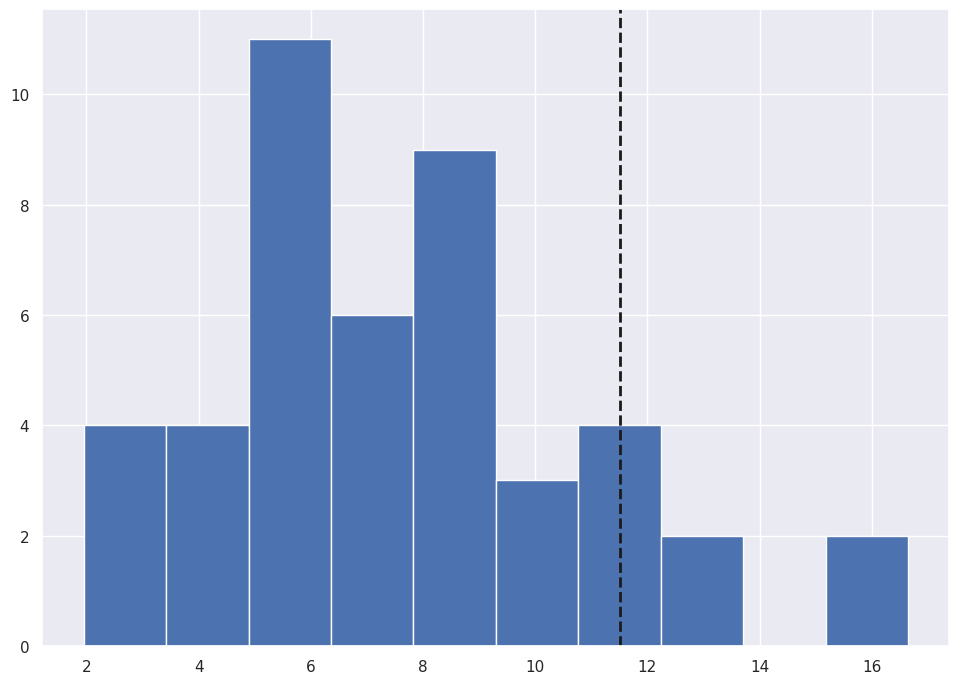

In [71]:
# Dados
media_populacional = 7.85
media_amostral = 11.52
desvio_padrao_amostral = 3.32
tamanho_amostra = 45

values = np.random.normal(media_populacional,desvio_padrao_amostral,tamanho_amostra)
plt.hist(values,10)
plt.axvline(media_amostral, color='k',linestyle='dashed', linewidth=2)
plt.show()

Acima temos o plot da distribuição dos dados analisados e na linha tracejada o preço encontrado. Para responder a pergunta vamos calcular quao o preo do sorvete na calda superior da distribuição, a 95% de significativa estatistica

In [95]:
import numpy as np
from scipy.stats import t

# Dados
media_populacional = 7.85
desvio_padrao_populacional = 3.32
media_amostral = 11.52
n = 45  # número de lojas

# Calculando o valor da variável teste (t)
t_valor = (media_amostral - media_populacional) / (desvio_padrao_populacional / np.sqrt(n))

# Graus de liberdade
graus_liberdade = n - 1

# Calculando o p-valor (usando uma distribuição t de Student)
p_valor = t.sf(np.abs(t_valor), graus_liberdade) *2  # multiplicado por 2 para teste bilateral

# Calculando o intervalo de confiança (95%)
erro_padrao = desvio_padrao_populacional / np.sqrt(n)
intervalo_confianca = t.interval(0.95, graus_liberdade, loc=media_amostral, scale=erro_padrao)

print("Valor da variável teste (t):", t_valor)
print("Intervalo de confiança (95%):", intervalo_confianca)
print("P-valor:", p_valor)

Valor da variável teste (t): 7.415394106106231
Intervalo de confiança (95%): (10.522561579904444, 12.517438420095555)
P-valor: 2.826669643852176e-09


Analise Com base nos resultados obtidos do teste T:

Valor da variável teste (t): O valor da variável teste é aproximadamente 7.42. Isso indica que a diferença entre a média amostral e a média populacional é 7.42 vezes maior do que o erro padrão esperado.

Intervalo de confiança (95%): O intervalo de confiança de 95% para a média amostral do preço do picolé nas cidades do litoral está entre R$10.52 e R$12.52. Isso significa que podemos estar razoavelmente confiantes de que a média verdadeira do preço do picolé nas cidades do litoral está dentro deste intervalo.

P-valor: O p-valor é extremamente baixo, aproximadamente 2.83e-09 (ou seja, 0.00000000283). Isso indica que a probabilidade de observar uma diferença tão grande ou maior entre a média amostral e a média populacional, supondo que não haja diferença real, é extremamente baixa.

Com base nesses resultados, podemos concluir que há uma diferença estatisticamente significativa entre o preço médio do picolé nas cidades do litoral e a média populacional. Portanto, rejeitamos a hipótese nula de que não há diferença significativa de preço de picolé nas cidades do litoral em comparação com a média populacional. Isso sugere que o efeito do verão pode estar influenciando o preço do picolé nessas localidades de praia, levando a um aumento significativo de preço em comparação com a média populacional.

In [90]:
##teste Z
from scipy.stats import norm
# Parâmetros
media_populacional = 7.85
desvio_padrao_populacional = 3.32
media_amostral = 11.52
tamanho_amostra = 45
nivel_significancia = 0.05

# Calculando o valor do teste Z
Z = (media_amostral - media_populacional) / (desvio_padrao_populacional / np.sqrt(tamanho_amostra))

# Calculando o intervalo de confiança
erro_padrao = desvio_padrao_populacional / np.sqrt(tamanho_amostra)
intervalo_confianca = norm.interval(1 - nivel_significancia, loc=media_amostral, scale=erro_padrao)

# Calculando o p-valor
p_valor = 2 * (1 - norm.cdf(np.abs(Z)))

print("Valor do teste Z:", Z)
print("Intervalo de confiança:", intervalo_confianca)
print("P-valor:", p_valor)

Valor do teste Z: 7.415394106106231
Intervalo de confiança: (10.549981721761917, 12.490018278238082)
P-valor: 1.212363542890671e-13


Analise resultados teste Z:

Valor do teste Z: O valor do teste Z é aproximadamente 7.42. Isso indica que a diferença entre a média amostral e a média populacional está a 7.42 desvios padrão da média populacional.

Intervalo de confiança: O intervalo de confiança de 95% para a média populacional do preço do picolé é de aproximadamente (R$ 10.55, R$ 12.49). Isso significa que podemos ter 95% de confiança de que a verdadeira média do preço do picolé está dentro deste intervalo.

P-valor: O p-valor é muito pequeno, aproximadamente 1.21e-13 . Como o p-valor é menor do que o nível de significância de 0.05, rejeitamos a hipótese nula. Isso indica que há evidências estatísticas suficientes para concluir que a diferença nos preços é estatisticamente significativa.

Portanto, com 95% de confiança, podemos afirmar que, de fato, devido ao verão, em determinadas localidades de praia, o preço do picolé está mais caro.